## The Curse of Dimensionality

Humans are bound by their perception of a maximum of three dimensions. We can’t comprehend shapes/graphs beyond three dimensions. Often, data scientists get datasets which have thousands of features. They give birth to two kinds of problems:

* **Increase in computation time:** Majority of the machine learning algorithms they rely on the calculation of distance for model building and as the number of dimensions increases it becomes more and more computation-intensive to create a model out of it. For example, if we have to calculate the distance between two points in just one dimension, like two points on the number line, we’ll just subtract the coordinate of one point from another and then take the magnitude:

Distance= $ x_1-x_2 $

What if we need to calculate the distance between two points in two dimensions?

The same formula translates to:
Distance= $ \sqrt {(x_1-x_2)^2+(y_1-y_2)^2} $

What if we need to calculate the distance between two points in three dimensions?

The same formula translates to:
Distance= $ \sqrt {(x_1-x_2)^2+(y_1-y_2)^2+(z_1-z_2)^2}$

And for N-dimensions, the formula becomes:
Distance=$ \sqrt {(a_1-a_2)^2+(b_1-b_2)^2+(c_1-c_2)^2+…+(n_1-n_2)^2} $

This is the effort of calculating the distance between two points. Just imagine the number of calculations involved for all the data points involved.

One more point to consider is that as the number of dimension increases, points are going far away from each other. This means that any new point that comes when we are testing the model is going to be farther away from our training points. This leads to a less reliable model, and it makes our model overfitted to the training data.



* **Hard (or almost impossible) to visualise the relationship between features:** As stated above, humans can not comprehend things beyond three dimensions. So, if we have an n-dimensional dataset, the only solution left to us is to create either a 2-D or 3-D graph out of it. Let’s say for simplicity, we are creating 2-D graphs. Suppose we have 1000 features in the dataset. That results in a  total (1000*999)/2= 499500 combinations possible for creating the 2-D graph.

Is it humanly possible to analyse all those graphs to understand the relationship between the variables?

**The questions that we need to ask at this point are:**

* Are all the features really contributing to decision making?
* Is there a way to come to the same conclusion using a lesser number of features?
* Is there a way to combine features to create a new feature and drop the old ones?
* Is there a way to remodel features in a way to make them visually comprehensible?

The answer to all the above questions is- _Dimensionality Reduction technique._




## Principal Component Analysis: 
The principal component analysis is an unsupervised machine learning algorithm used for feature selection using dimensionality reduction techniques. As the name suggests, it finds out the principal components from the data. PCA transforms and fits the data from a higher-dimensional space to a new, lower-dimensional subspace This results into an entirely new coordinate system of the points where the first axis corresponds to the first principal component that explains the most variance in the data.

**What are the principal components?**
Principal components are the derived features which explain the maximum variance in the data. The first principal component explains the most variance, the 2nd a bit less and so on. Each of the new dimensions found using PCA is a linear combination of the old features.

Let's take the following example where the data is distributed like the diagram on the left:
<img src="PCA_intro1.PNG" width="500">



**what is the optimum number of Principal components needed?**


#### Explained Variance Ratio

All of the above questions are answered using the *explained variance ratio*. It represents the amount of variance each principal component is able to explain.

For example, suppose if the square of distances of all the points from the origin that lie on PC1 is 50 and for the points on PC2 it’s 5.

EVR of PC1=$\frac{Distance of PC1 points}{( Distance of PC1 points+ Distance of PC2 points)}=\frac{50}{55}=0.91 $

EVR of PC2=$\frac{Distance of PC2 points}{( Distance of PC1 points+ Distance of PC2 points)}=\frac{5}{55}=0.09 $


Thus PC1 explains 91% of the variance of data. Whereas, PC2 only explains 9% of the variance. Hence we can use only PC1 as the input for our model as it explains the majority of the variance.

In a real-life scenario, this problem is solved using the **Scree Plots**

## Scree Plots:
Scree plots are the graphs that convey how much variance is explained by corresponding Principal components. 
<img src="scree.PNG" width="500">

As shown in the given diagram, around 75 principal components explain approximately 90 % of the variance. Hence, 75 can be a good choice based on the scenario

In [2]:
# importing important labries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# So, Basically we are going to use inbuilt dataset from seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [6]:
# here we are loading Brain Networks datasets
df = sns.load_dataset("brain_networks")

In [7]:
df

,network,1,1.1,2,2.1,3,3.1,4,4.1,5,...,16.5,16.6,16.7,17,17.1,17.2,17.3,17.4,17.5,17.6
0,node,1,1,1,1,1,1,1,1,1,...,3,4,4,1,1,2,2,3,3,4
1,hemi,lh,rh,lh,rh,lh,rh,lh,rh,lh,...,rh,lh,rh,lh,rh,lh,rh,lh,rh,lh
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,56.05574417114258,92.03103637695312,3.391575574874878,38.65968322753906,26.203819274902344,-49.71556854248047,47.4610366821289,26.746612548828125,-35.898860931396484,...,0.6079040169715881,-70.27054595947266,77.36577606201172,-21.73455047607422,1.0282527208328247,7.7917842864990225,68.90372467041016,-10.520872116088867,120.49046325683594,-39.686431884765625
4,1,55.5472526550293,43.6900749206543,-65.49598693847656,-13.974522590637207,-28.27496337890625,-39.05012893676758,-1.2106596231460571,-19.012897491455078,19.568010330200195,...,57.49507141113281,-76.39321899414062,127.26136016845705,-13.035799026489258,46.3818244934082,-15.752449989318848,31.00033187866211,-39.607521057128906,24.76401138305664,-36.7710075378418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,915,-7.4295125007629395,-4.81321907043457,-3.670536518096924,1.4422610998153689,-19.6804313659668,-29.109355926513672,-3.3765623569488525,-8.764892578125,0.017911728471517563,...,58.28579330444336,68.55741119384766,22.83304786682129,76.17948913574219,51.9346694946289,-6.614512920379639,-6.690762042999268,22.893030166625977,48.27437973022461,76.22845458984375
919,916,-33.55413818359375,-38.60562133789063,-25.66480255126953,-30.252351760864254,5.5627851486206055,20.182186126708984,17.91124725341797,24.65358161926269,-32.93561172485352,...,59.86481857299805,23.00457763671875,7.6574625968933105,50.96239852905274,13.696922302246096,63.50361633300781,57.40117645263672,24.97454833984375,51.97215270996094,64.53878784179689
920,917,-78.53956604003906,-74.19718933105469,-54.04159545898438,-39.97029113769531,-14.277058601379395,-30.606460571289066,60.62852096557617,62.02702331542969,-32.80055618286133,...,68.76786804199219,49.66401672363281,64.55149841308594,43.80074691772461,8.144479751586914,47.28145980834961,70.49964904785156,66.99440002441406,81.53924560546875,64.96977233886719
921,918,-103.23582458496094,-98.7442855834961,-40.10954284667969,-44.90773391723633,12.109148025512695,1.6213401556015017,33.765560150146484,55.35607147216797,-14.330512046813965,...,103.1552505493164,106.45484924316406,9.04682731628418,46.67441940307617,40.95479583740234,0.8771800398826599,37.57715225219727,20.517745971679688,3.124434232711792,56.71838760375977


In [10]:
# here we are resting the index of our data
df.reset_index(drop=True, inplace=True)

In [11]:
df

,network,1,1.1,2,2.1,3,3.1,4,4.1,5,...,16.5,16.6,16.7,17,17.1,17.2,17.3,17.4,17.5,17.6
0,node,1,1,1,1,1,1,1,1,1,...,3,4,4,1,1,2,2,3,3,4
1,hemi,lh,rh,lh,rh,lh,rh,lh,rh,lh,...,rh,lh,rh,lh,rh,lh,rh,lh,rh,lh
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,56.05574417114258,92.03103637695312,3.391575574874878,38.65968322753906,26.203819274902344,-49.71556854248047,47.4610366821289,26.746612548828125,-35.898860931396484,...,0.6079040169715881,-70.27054595947266,77.36577606201172,-21.73455047607422,1.0282527208328247,7.7917842864990225,68.90372467041016,-10.520872116088867,120.49046325683594,-39.686431884765625
4,1,55.5472526550293,43.6900749206543,-65.49598693847656,-13.974522590637207,-28.27496337890625,-39.05012893676758,-1.2106596231460571,-19.012897491455078,19.568010330200195,...,57.49507141113281,-76.39321899414062,127.26136016845705,-13.035799026489258,46.3818244934082,-15.752449989318848,31.00033187866211,-39.607521057128906,24.76401138305664,-36.7710075378418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,915,-7.4295125007629395,-4.81321907043457,-3.670536518096924,1.4422610998153689,-19.6804313659668,-29.109355926513672,-3.3765623569488525,-8.764892578125,0.017911728471517563,...,58.28579330444336,68.55741119384766,22.83304786682129,76.17948913574219,51.9346694946289,-6.614512920379639,-6.690762042999268,22.893030166625977,48.27437973022461,76.22845458984375
919,916,-33.55413818359375,-38.60562133789063,-25.66480255126953,-30.252351760864254,5.5627851486206055,20.182186126708984,17.91124725341797,24.65358161926269,-32.93561172485352,...,59.86481857299805,23.00457763671875,7.6574625968933105,50.96239852905274,13.696922302246096,63.50361633300781,57.40117645263672,24.97454833984375,51.97215270996094,64.53878784179689
920,917,-78.53956604003906,-74.19718933105469,-54.04159545898438,-39.97029113769531,-14.277058601379395,-30.606460571289066,60.62852096557617,62.02702331542969,-32.80055618286133,...,68.76786804199219,49.66401672363281,64.55149841308594,43.80074691772461,8.144479751586914,47.28145980834961,70.49964904785156,66.99440002441406,81.53924560546875,64.96977233886719
921,918,-103.23582458496094,-98.7442855834961,-40.10954284667969,-44.90773391723633,12.109148025512695,1.6213401556015017,33.765560150146484,55.35607147216797,-14.330512046813965,...,103.1552505493164,106.45484924316406,9.04682731628418,46.67441940307617,40.95479583740234,0.8771800398826599,37.57715225219727,20.517745971679688,3.124434232711792,56.71838760375977


In [12]:
df.info()  # getting informations of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 63 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   network  922 non-null    object
 1   1        922 non-null    object
 2   1.1      922 non-null    object
 3   2        922 non-null    object
 4   2.1      922 non-null    object
 5   3        922 non-null    object
 6   3.1      922 non-null    object
 7   4        922 non-null    object
 8   4.1      922 non-null    object
 9   5        922 non-null    object
 10  5.1      922 non-null    object
 11  6        922 non-null    object
 12  6.1      922 non-null    object
 13  6.2      922 non-null    object
 14  6.3      922 non-null    object
 15  7        922 non-null    object
 16  7.1      922 non-null    object
 17  7.2      922 non-null    object
 18  7.3      922 non-null    object
 19  7.4      922 non-null    object
 20  7.5      922 non-null    object
 21  8        922 non-null    object
 22  8.

* Basically we can see there is no missing values.
* Every column has object data type but it should integer datatype.

In [14]:
df.describe()   # getting statistical informations of data

,network,1,1.1,2,2.1,3,3.1,4,4.1,5,...,16.5,16.6,16.7,17,17.1,17.2,17.3,17.4,17.5,17.6
count,922,922,922,922,922,922,922,922,922,922,...,922,922,922,922,922,922,922,922,922,922
unique,922,922,922,922,922,922,922,922,922,922,...,922,922,922,922,922,922,922,922,922,922
top,node,1,1,1,1,1,1,1,1,1,...,3,4,4,1,1,2,2,3,3,4
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Data Preprocessing

In [15]:
# here we are displaying the index for showing all columns and rows
pd.set_option("display.max_rows",None)

In [18]:
# Checking for missing values
df.isnull().sum()

network    1
1          1
1.1        1
2          1
2.1        1
3          1
3.1        1
4          1
4.1        1
5          1
5.1        1
6          1
6.1        1
6.2        1
6.3        1
7          1
7.1        1
7.2        1
7.3        1
7.4        1
7.5        1
8          1
8.1        1
8.2        1
8.3        1
8.4        1
8.5        1
9          1
9.1        1
10         1
10.1       1
11         1
11.1       1
12         1
12.1       1
12.2       1
12.3       1
12.4       1
13         1
13.1       1
13.2       1
13.3       1
13.4       1
13.5       1
14         1
14.1       1
15         1
15.1       1
16         1
16.1       1
16.2       1
16.3       1
16.4       1
16.5       1
16.6       1
16.7       1
17         1
17.1       1
17.2       1
17.3       1
17.4       1
17.5       1
17.6       1
dtype: int64

In [28]:
df = df.astype(float)   # converting all columns dtype into float
df

ValueError: could not convert string to float: 'node'

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 63 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   network  922 non-null    object
 1   1        922 non-null    object
 2   1.1      922 non-null    object
 3   2        922 non-null    object
 4   2.1      922 non-null    object
 5   3        922 non-null    object
 6   3.1      922 non-null    object
 7   4        922 non-null    object
 8   4.1      922 non-null    object
 9   5        922 non-null    object
 10  5.1      922 non-null    object
 11  6        922 non-null    object
 12  6.1      922 non-null    object
 13  6.2      922 non-null    object
 14  6.3      922 non-null    object
 15  7        922 non-null    object
 16  7.1      922 non-null    object
 17  7.2      922 non-null    object
 18  7.3      922 non-null    object
 19  7.4      922 non-null    object
 20  7.5      922 non-null    object
 21  8        922 non-null    object
 22  8.

In [29]:
df.astype(float)

ValueError: could not convert string to float: 'node'

In [23]:
# Applying StandardScaler 

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
scaled_data


ValueError: could not convert string to float: 'node'

In [18]:
## creating new dataframe
df=pd.DataFrame(data=scaled_data, columns= df.columns)

In [19]:
df.head()

,1,1.1,2,2.1,3,3.1,4,4.1,5,5.1,...,16.5,16.6,16.7,17,17.1,17.2,17.3,17.4,17.5,17.6
0,1.147100,1.725164,0.086070,0.910341,1.007883,-1.509513,1.682649,0.935351,-1.034199,-0.048175,...,0.010206,-1.208050,1.836036,-0.712296,0.030463,0.207733,1.991584,-0.281824,2.925073,-0.809775
1,1.136697,0.819233,-1.665068,-0.329729,-1.087647,-1.185717,-0.043094,-0.665682,0.563828,0.408914,...,1.085760,-1.313225,3.019941,-0.427128,1.377128,-0.421367,0.895476,-1.062346,0.600369,-0.750353
2,1.248206,1.189332,-1.299337,-0.319994,-0.724844,-0.037055,-2.325276,-3.001639,0.554593,0.956286,...,0.534103,0.154756,1.079776,0.853667,1.015781,0.034971,-0.654007,0.348945,-1.823052,0.130256
3,0.379075,0.237662,-0.879090,-0.770102,-0.285477,0.519557,-1.482293,-2.051112,0.947840,0.288083,...,1.349406,1.130104,-0.253499,1.813020,0.126273,-0.065129,0.348861,-0.424001,-0.908338,-0.095683
4,-0.051415,-1.182147,-0.351304,-0.373632,-1.739320,0.105580,-2.220236,-1.717548,0.530084,0.083059,...,1.806155,0.874453,-0.550089,1.412091,1.550475,0.753918,-0.339923,0.146842,0.124527,1.788837


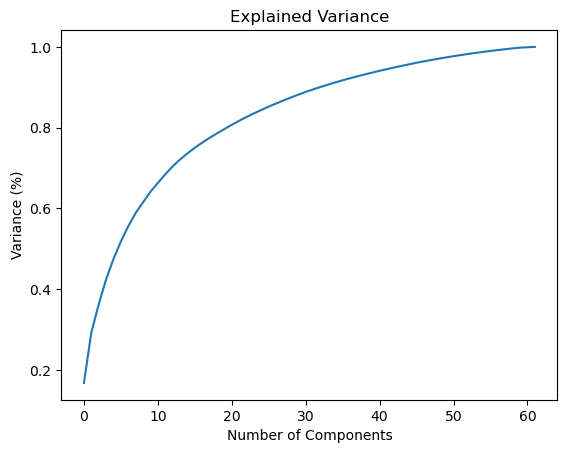

In [20]:
## getting the optimal number of pca
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [35]:
np.where(np.cumsum(pca.explained_variance_ratio_)>0.9)

(array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
        49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),)

In [36]:
np.where(np.cumsum(pca.explained_variance_ratio_)>0.95)

(array([43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
        60, 61]),)

From the diagram and code above, it can be seen that 32 principal components explain almost 90% of the variance in data and 43 principal components explain around 95% of the variance in data.

So, instead of giving all the columns as input, we’d only feed these 32 or 43 principal components of the data to the machine learning algorithm and we’d obtain a similar result.

In [38]:
pca = PCA(n_components=43)
new_data = pca.fit_transform(df)
# This will be the new data fed to the algorithm.
# Number of columns
num_components = 43

# Column names pattern
column_names = [f'principal component {i}' for i in range(1, num_components + 1)]

# Create DataFrame
principal_Df = pd.DataFrame(data=new_data, columns=column_names)


In [39]:
principal_Df

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 34,principal component 35,principal component 36,principal component 37,principal component 38,principal component 39,principal component 40,principal component 41,principal component 42,principal component 43
0,1.655937,0.779447,-2.377400,-4.888855,-0.977575,1.336602,3.590963,-0.588800,-1.716008,0.163731,...,-0.145965,-0.309988,1.498823,0.845610,-0.122212,0.192183,0.582400,-0.142089,-0.730332,0.308359
1,2.323247,-1.007189,-1.814792,-4.435043,3.095036,-0.082943,2.028901,-1.490401,-1.470771,-2.798729,...,1.000011,-0.189043,0.296895,0.439913,0.650837,0.677532,-0.530166,-0.381122,0.645609,0.505905
2,0.301161,-2.715173,-1.138535,-1.573979,1.513119,0.544081,0.665594,-1.687164,1.107657,-2.317461,...,0.444731,-0.213572,-0.390190,-0.380531,1.091226,0.993919,0.874349,-1.064820,0.070750,-0.734273
3,0.331745,-3.560087,-0.423917,0.930106,2.305437,-1.585218,0.319676,-0.136145,0.412278,-0.595822,...,0.700256,1.001873,-0.248500,-0.325596,0.032225,-0.580527,-0.144230,-0.530396,-0.888729,0.529660
4,4.155373,-2.724240,2.273338,0.803203,1.810133,-0.361164,-1.425360,-0.202324,0.941189,-0.100334,...,-0.734611,-0.410204,-0.211578,-0.192900,0.044627,0.800354,0.417591,-0.843012,0.162615,0.533186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,3.977838,-3.817664,-3.513406,-0.280805,1.767191,0.242916,-1.670009,1.905639,0.270551,-0.378018,...,0.731180,-0.434895,-0.664001,0.376719,0.231051,0.029560,0.692584,0.336430,0.353562,-0.507371
916,2.993133,0.538858,-2.806242,1.479797,-0.037923,0.194619,0.312571,1.447452,-0.856957,0.486713,...,-0.473495,-0.242362,-0.046754,0.595461,0.031488,-0.154927,-0.212606,0.523015,-0.181832,0.139216
917,4.726283,2.227092,-3.078126,2.690090,0.607311,0.011621,1.564819,2.187251,-0.038027,-0.298861,...,-0.381230,-0.856107,-0.337329,-0.254432,-0.323451,-0.381920,-0.281869,0.616808,-0.636319,-0.435516
918,4.953107,1.324104,-1.561788,2.320683,1.035273,-1.226645,-0.161663,2.464418,-0.641554,-0.376421,...,-0.787257,-1.102153,-0.982187,-0.269476,-0.041827,0.066011,0.552036,0.679856,-0.761813,0.654420


* Here, we see that earlier we had 62 columns in the data earlier. Now with the help of Scree plot and PCA, we have reduced the number of      features to be used for model building to 43. This is the advantage of PCA. _It drastically reduces the number of features, thereby           considerably reducing the training time for the model._

**Pros of PCA:**

- Correlated features are removed.
- Model training time is reduced.
- Overfitting is reduced.
- Helps in better visualizations
- Ability to handle noise

**Cons of PCA**
- The resultant principal components are less interpretable than the original data
- Can lead to information loss if the explained variance threshold is not considered appropriately.



### Conclusion
From all the explanations above, we can conclude that PCA is a very powerful technique for reducing the dimensions of the data, projecting the data from a higher dimension to a lower dimension, helps in data visualization, helps in data compression and most of all increases the model training speed drastically by decreasing the number of variables involved in computation.

In [22]:
list1=[1,23,4,5,6,8,9,7]
even=[i for i in list1 if i%2==0]
odd=[i for i in list1 if i%2!=0]
print(even)
print(odd)

[4, 6, 8]
[1, 23, 5, 9, 7]
